In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids, AllKNN
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import read_and_process_data, plot_pie_chart

random.seed(0)

In [2]:
data = read_and_process_data('dataset_diabetes/diabetic_data.csv')
data.head(5)

---Retreived data from dataset_diabetes/diabetic_data.csv
Number of records: 101766 Number of features: 50
+--------------------------+---------------------------+
|         Feature          | Number of Unique Elements |
+--------------------------+---------------------------+
|       encounter_id       |           101766          |
|       patient_nbr        |           71518           |
|           race           |             6             |
|          gender          |             3             |
|           age            |             10            |
|          weight          |             10            |
|    admission_type_id     |             8             |
| discharge_disposition_id |             26            |
|   admission_source_id    |             17            |
|     time_in_hospital     |             14            |
|        payer_code        |             18            |
|    medical_specialty     |             73            |
|    num_lab_procedures    |          

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.396047,-0.924942,-3.287658,-0.707351,-0.524964,0.407501,-0.475073,-0.351390,0.804171,-0.790556,...,0.0,1.905345,-0.081685,-0.011416,-0.003097,0.0,-0.003097,-1.079375,0.54876,1.0
1,-1.926883,-0.924942,-2.646293,-0.707351,-0.524964,0.407501,-0.809166,0.138672,-1.630877,2.135806,...,0.0,-0.477883,-0.081685,-0.011416,-0.003097,0.0,-0.003097,0.926081,0.54876,2.0
2,0.396047,1.080616,-2.004928,-0.707351,-0.524964,0.407501,-0.809166,-0.160217,0.043218,-0.205284,...,0.0,1.905345,-0.081685,-0.011416,-0.003097,0.0,-0.003097,-1.079375,0.54876,2.0
3,0.396047,1.080616,-1.363563,-0.707351,-0.524964,0.407501,-1.143260,-0.374086,0.398330,-0.790556,...,0.0,0.713731,-0.081685,-0.011416,-0.003097,0.0,-0.003097,-1.079375,0.54876,2.0
4,0.396047,1.080616,-0.722198,-0.017799,-0.524964,-1.012969,-0.475073,0.204307,-0.616274,2.721079,...,0.0,0.713731,-0.081685,-0.011416,-0.003097,0.0,-0.003097,0.926081,0.54876,1.0


In [3]:
features = data.columns[:-1]
X = np.array(data[features]) # Features
y = np.array(data[data.columns[-1]]).astype(int) # Target variable
print("Input data shape", X.shape, "Output data shape", y.shape)

Input data shape (98053, 45) Output data shape (98053,)


In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds = kfold.split(X, y)
folds = [(train, test) for train, test in folds]

In [5]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=25, step=1)
selected = selector.fit(X[folds[0][1]], y[folds[0][1]])
print(selected.support_)
print(selected.ranking_)

[False  True  True  True  True  True False False False  True  True  True
  True  True False False  True  True  True  True False  True  True  True
  True False  True False False  True False  True  True False  True False
 False False False  True False False False False  True]
[14  1  1  1  1  1  2  3  5  1  1  1  1  1  8  7  1  1  1  1 11  1  1  1
  1 16  1 10  9  1  6  1  1 15  1 19 20  4 12  1 18 21 17 13  1]


In [6]:
selected_feat = []
for tak, (i, col) in zip(selected.support_, enumerate(data.columns[:-1])):
    if tak:
        print(col, i)
        selected_feat.append((col, i))

gender 1
age 2
admission_type_id 3
discharge_disposition_id 4
admission_source_id 5
num_procedures 9
num_medications 10
number_outpatient 11
number_emergency 12
number_inpatient 13
diag_3 16
number_diagnoses 17
max_glu_serum 18
A1Cresult 19
repaglinide 21
nateglinide 22
chlorpropamide 23
glimepiride 24
glipizide 26
pioglitazone 29
acarbose 31
miglitol 32
tolazamide 34
glipizide-metformin 39
diabetesMed 44


In [7]:
X_rfe = selector.transform(X)
X_rfe.shape

(98053, 25)

In [12]:
# X_cs, y_cs = SMOTEENN(random_state=0).fit_resample(X_rfe, y)

X_cs, y_cs = ADASYN(sampling_strategy='not majority', 
                    n_neighbors=7, random_state=0).fit_resample(X_rfe, y)

print('After over-sampling', X_cs.shape, y_cs.shape)

After over-sampling (154544, 25) (154544,)


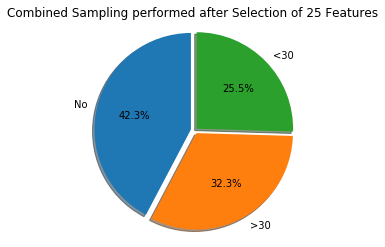

In [20]:
plot_pie_chart(['No', '>30', '<30'], y_cs, 25)

In [18]:
X_cs, y_cs = AllKNN(sampling_strategy='all', n_neighbors=7).fit_resample(X_cs, y_cs)

print('After combined-sampling', X_cs.shape, y_cs.shape)

After combined-sampling (113077, 25) (113077,)


In [19]:
np.save('npy_data_2/X_combinedSampling_25Features_task1.npy', X_cs)
np.save('npy_data_2/y_combinedSampling_25Features_task1.npy', y_cs)
np.save('npy_data_2/selected_features_25_task1.npy', selected_feat)